Introduction 

Credit card fraud is a major concern for banks and financial institutions. Fraudsters use various techniques to steal credit card information and make unauthorized transactions. In this project, we will explore a dataset containing credit card transactions and build models to predict fraudulent transactions.

We will use the Kaggle dataset Credit Card Fraud Detection which contains credit card transactions made by European cardholders. The dataset consists of 284,807 transactions, out of which 492 are fraudulent. The data contains only numerical input variables which are a result of Principal Component Analysis (PCA) transformations due to confidentiality issues. The features include 'Time', 'Amount', and 'V1' through 'V28', as well as the 'Class' variable, which is the target variable indicating whether the transaction is fraudulent (1) or not (0).

In this project, we will start with exploratory data analysis (EDA) to get a better understanding of the data. Next, we will perform data processing and modeling, where we will build several classification models to predict fraudulent transactions. We will also address the issue of imbalanced classes by using undersampling. Finally, we will evaluate the performance of the models and choose the best one based on various evaluation metrics such as precision, recall, F1-score, and accuracy.

In [3]:
# Import necessary libraries
%matplotlib inline
import scipy.stats as stats
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV


import sklearn.metrics as metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, precision_recall_curve, f1_score, fbeta_score, accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, classification_report
from sklearn.model_selection import cross_val_score


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
import xgboost as xgb
from xgboost import XGBClassifier

#import sqrt
from math import sqrt



Exploratory Data Analysis

This part of analysis includes 
1. loading the csv file in a dataframe 
2. observing its shape
3. getting anover view of the types of data and observing if there is any null value present
4. getting a statistical inside of each coloums 

In [4]:
#reading the csv file 
df = pd.read_csv('creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
#printing the shape of the dataset
print(df.shape)

(284807, 31)


In [6]:
#overview of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [7]:
#statistical overview of the dataset
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


Fraud detection 

we can observe that the dataset is highly imbalanced, with a vast majority of transactions being non-fraudulent (class 0) and a relatively small number of transactions being fraudulent (class 1). This indicates that the dataset has a class imbalance problem, which may affect the performance of a model trained on this dataset. It may be necessary to use techniques such as oversampling, undersampling, or class weighting to handle the class imbalance problem when building a model for fraud detection.

In [8]:
#checking the different types of class under the class coloumn
df['Class'].unique()

array([0, 1], dtype=int64)

In [9]:
#the sum of different types of class
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

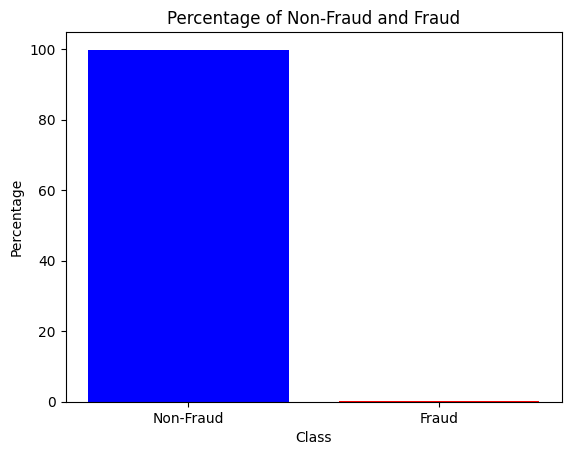

In [10]:
#% of different types of class
percentage = df['Class'].value_counts(normalize=True) * 100

#plotting the percentage of different types of class 
classes = ['Non-Fraud', 'Fraud']
plt.bar(classes, color = ['blue', 'red'], height = percentage)
plt.title('Percentage of Non-Fraud and Fraud')
plt.xlabel('Class')
plt.ylabel('Percentage')
plt.show()

From the heatmap, it can be observed that there are no strong positive or negative correlations between any pairs of variables in the dataset. The strongest correlations are found:

Time and V3, with a correlation coefficient of -0.42
Amount and V2, with a correlation coefficient of -0.53
Amount and V4, with a correlation coefficient of 0.4.

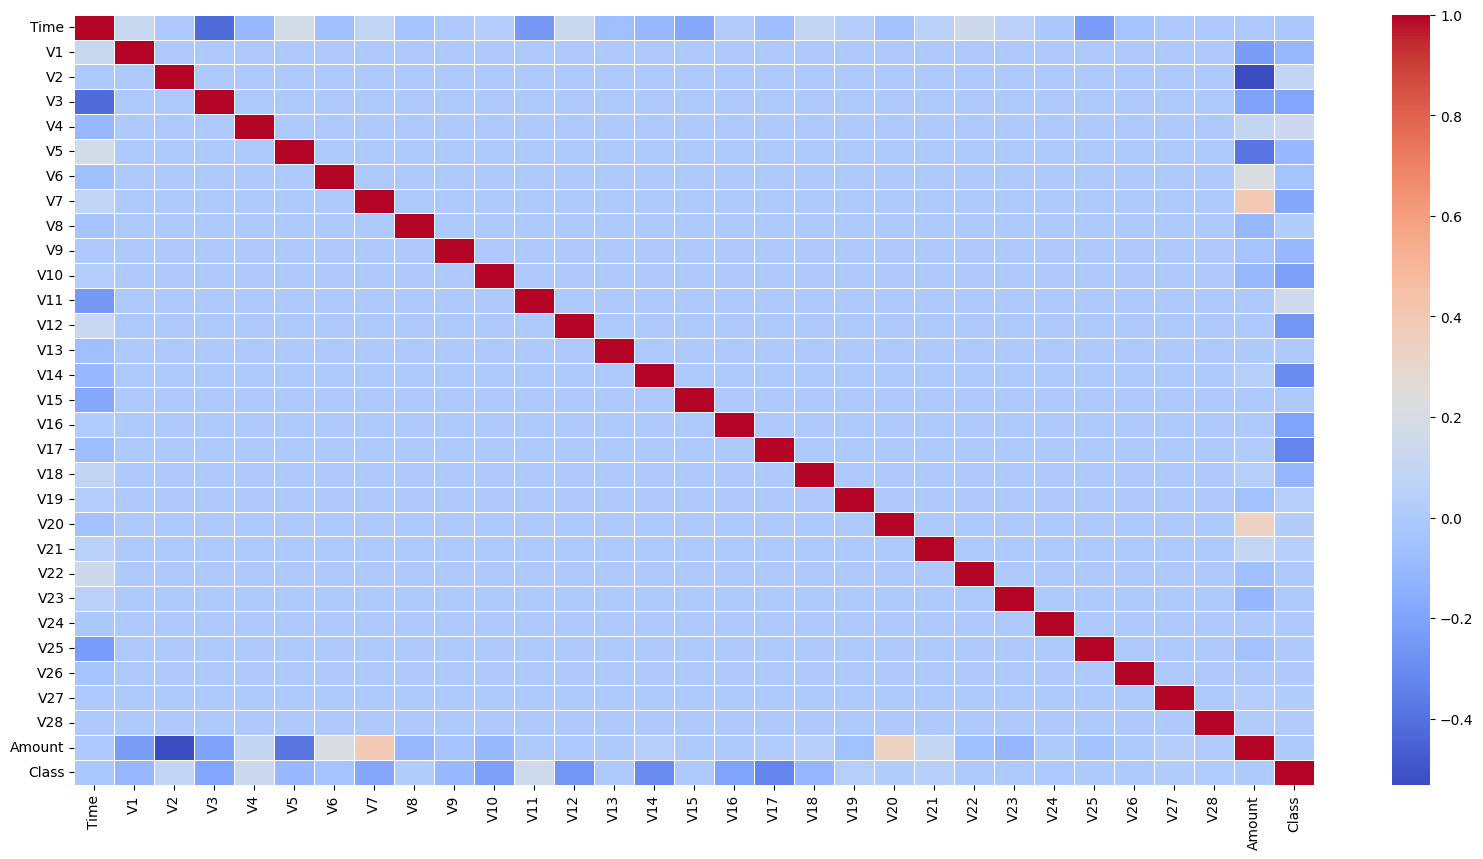

In [11]:
#plotting the heatmap of correlation between different features
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=False, cmap='coolwarm', linewidths=.5)
plt.show()

Modeling 

The "Credit Card Fraud Detection" dataset has credit card transactions labeled as fraudulent or not. The dataset is imbalanced, so it needs a model that can accurately detect fraudulent transactions without wrongly flagging non-fraudulent transactions.

1. Dataset is divided into train, test, validation in 60 :20 :20 ratio 
2. since the units of measurement inside data is different for each coloums, we used to standardscalar() to standardise each measurements.StandardScaler standardizes data by giving it a mean of 0 and a standard deviation of 1, which results in a normal distribution. This technique works well when dealing with a wide range of amounts and time. To scale the data, the training set is used to initialize the fit, and the train, validation, and test sets are then scaled before running them into the models.
3. Initially we installed both RandomUnderSampling and RandomOverSampling to balance the imbalanced dataset, how ever we sticked to RandomUnderSampling as RandomOverSampling was returning a very large dataset which took longer time to train the models 
4. Models used - logistic regression, Random Forest, SVM, XGboost


In [12]:
#splitting data 
data = df.drop(['Class'], axis=1)
target = df['Class']


In [13]:
# Split data into training, validation and test sets, ensuring the class distribution is maintained
X_trainval, X_test, y_trainval, y_test = train_test_split(data, target
                                                          , test_size=0.2
                                                          , stratify=df['Class']
                                                          , random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval
                                                  , test_size=0.25
                                                  , stratify=y_trainval
                                                  , random_state=42)

In [14]:
#standardizing the data as time and amount are in different units, fit is done to do the calculation and transform is done to apply the transformation
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)
X_test = scaler.transform(X_test)


In [15]:
#RandomUnderSampler
rus = RandomUnderSampler(random_state=42)
X_train_rus, y_train_rus = rus.fit_resample(X_train, y_train)
x_val_rus, y_val_rus = rus.fit_resample(X_val, y_val)

In [16]:
X_train_rus.shape

(590, 30)

In [17]:
#randomoversampler
ros = RandomOverSampler(random_state=42)
X_train_ros, y_train_ros = ros.fit_resample(X_train, y_train)
x_val_ros, y_val_ros = ros.fit_resample(X_val, y_val)


In [18]:
X_train_ros.shape

(341176, 30)

Logistic Regression 

The 'penalty' parameter determines the type of regularization to be applied in the logistic regression model. 

The 'tol' parameter specifies the tolerance for stopping criteria. It represents the tolerance for the change in the loss function or the coefficients between iterations. If the change in the loss or coefficients is below this tolerance, the optimization algorithm stops. 

The 'C' parameter determines the inverse of the regularization strength. A smaller 'C' value corresponds to a stronger regularization, while a larger 'C' value means weaker regularization. It basically determines the complexity of the model.  a smaller 'C' value results in stronger regularization and a simpler model. 

In [19]:
#Logistic Regression for undersampled data
penalty = ['l2']
tol = np.logspace(0,-4, 5)
C = np.logspace(0,4, 5)
param_grid = dict(penalty=penalty, tol=tol, C=C)

lr = LogisticRegression(solver = 'lbfgs' ,random_state=42, max_iter=10000)
lr_grid_under = GridSearchCV(lr, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
lr_grid_under.fit(X_train_rus, y_train_rus)
lr_grid_under_results = pd.DataFrame(lr_grid_under.cv_results_)
lr_grid_under_results[['param_C', 'param_penalty', 'param_tol', 'mean_test_score']]
lr_under_param = lr_grid_under.best_params_

Fitting 5 folds for each of 25 candidates, totalling 125 fits


In [20]:
lr_under_param

{'C': 100.0, 'penalty': 'l2', 'tol': 0.001}

In [21]:
#logistic regression for oversampled data
lr_grid_over = RandomizedSearchCV(lr, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 5)
lr_grid_over.fit(X_train_ros, y_train_ros)
lr_grid_over_results = pd.DataFrame(lr_grid_over.cv_results_)[['param_C', 'param_penalty', 'param_tol', 'mean_test_score']]
lr_over_param = lr_grid_over.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [22]:
#a list to append the scores of different models for there best parameters
scores = []
scores.append({'name': 'lr_under', 'mean_score': lr_grid_under_results['mean_test_score'].mean(), 'params': lr_under_param})
scores.append({'name': 'lr_over', 'mean_score': lr_grid_over_results['mean_test_score'].mean(), 'params': lr_over_param})


In [23]:
scores = pd.DataFrame(scores)
scores

,name,mean_score,params
0,lr_under,0.981858,"{'C': 100.0, 'penalty': 'l2', 'tol': 0.001}"
1,lr_over,0.992529,"{'tol': 0.01, 'penalty': 'l2', 'C': 1000.0}"


Random Forest

n_estimators:This parameter determines the number of decision trees to be created in an ensemble learning method, such as Random Forest.

criteria : The 'criteria' parameter specifies the criterion used for splitting data in decision trees. Gini quantifies the impurity or the probability of misclassification at a particular node in a decision tree.Entropy is a measure of impurity or disorder in a set of samples within a node of a decision tree or any other classification algorithm

max_depth : max_depth' determines the maximum depth or maximum number of levels that a decision tree can grow. 

min_samples_split: This parameter specifies the minimum number of samples required to split an internal node in a decision tree.

min_samples_leaf: 'min_samples_leaf' determines the minimum number of samples required to be present in a leaf node

max_features:'max_features' determines the number of features to consider when looking for the best split at each node in a decision tree. It controls the randomness in feature selection, which can improve generalization and reduce overfitting. In your case, it specifies two options: 'sqrt' (square root of the total number of features) and 'log2' (logarithm base 2 of the total number of features).

In [24]:
#Random Forest for undersampled data
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 3)]
criteria = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(3,10, num = 3)]
min_samples_split = [int(x) for x in np.linspace(2,10, num = 3)]
min_samples_leaf = [int(x) for x in np.linspace(1,10, num = 3)]
max_features = ['sqrt', 'log2']
param_grid = dict(n_estimators=n_estimators, criterion=criteria, max_depth=max_depth, min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf,  max_features=max_features)


rf = RandomForestClassifier(random_state=42)
rf_grid_under = RandomizedSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 5)
rf_grid_under.fit(X_train_rus, y_train_rus)
rf_grid_under_results = pd.DataFrame(rf_grid_under.cv_results_)[['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']]
rf_under_param = rf_grid_under.best_params_

Fitting 5 folds for each of 5 candidates, totalling 25 fits


In [25]:
"""
rf_grid_over = RandomizedSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 5)
rf_grid_over.fit(X_train_ros, y_train_ros)
rf_grid_over_results = pd.DataFrame(rf_grid_over.cv_results_)[['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']]
rf_over_param = rf_grid_over.best_params_
"""

"\nrf_grid_over = RandomizedSearchCV(rf, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 5)\nrf_grid_over.fit(X_train_ros, y_train_ros)\nrf_grid_over_results = pd.DataFrame(rf_grid_over.cv_results_)[['param_n_estimators', 'param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_score']]\nrf_over_param = rf_grid_over.best_params_\n"

In [26]:
scores = scores.append({'name': 'rf_under', 'mean_score': rf_grid_under_results['mean_test_score'].mean(), 'params': rf_under_param} , ignore_index=True)
#scores.append({'name': 'rf_over', 'mean_score': rf_grid_over_results['mean_test_score'].mean(), 'params': rf_over_param})

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\2087426815.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'name': 'rf_under', 'mean_score': rf_grid_under_results['mean_test_score'].mean(), 'params': rf_under_param} , ignore_index=True)


In [27]:
scores

,name,mean_score,params
0,lr_under,0.981858,"{'C': 100.0, 'penalty': 'l2', 'tol': 0.001}"
1,lr_over,0.992529,"{'tol': 0.01, 'penalty': 'l2', 'C': 1000.0}"
2,rf_under,0.982545,"{'n_estimators': 1000, 'min_samples_split': 10..."


SVM

The 'kernel' parameter specifies the type of kernel function to be used in the SVM model. It defines the type of decision boundary created by the model. The options provided in your code are 'linear', 'poly' (polynomial), 'rbf' (Radial Basis Function), and 'sigmoid'.

The 'C' parameter determines the inverse of the regularization strength. A smaller 'C' value corresponds to a stronger regularization, while a larger 'C' value means weaker regularization. It basically determines the complexity of the model.  a smaller 'C' value results in stronger regularization and a simpler model. 

The 'gamma' parameter determines the kernel coefficient for 'rbf', 'poly', and 'sigmoid' kernels. It defines the influence of a single training example. 'scale' and 'auto' are two options for setting the gamma value. 'scale' sets gamma as 1 / (n_features * X.var()) and 'auto' sets gamma as 1 / n_features. Gamma values influence the flexibility and smoothness of the decision boundary.


In [28]:
#svm for undersampled data
kernel = ['linear', 'poly', 'rbf', 'sigmoid']
C = np.logspace(0,4, 3)
gamma = ['scale', 'auto']
param_grid = dict(kernel=kernel, C=C, gamma=gamma)

svc = svm.SVC(random_state=42)
svc_grid_under = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1)
svc_grid_under.fit(X_train_rus, y_train_rus)
svc_grid_under_results = pd.DataFrame(svc_grid_under.cv_results_)[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]
svc_under_param = svc_grid_under.best_params_


Fitting 5 folds for each of 24 candidates, totalling 120 fits


In [29]:
"""
svm_grid_over = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 3)
svm_grid_over.fit(X_train_ros, y_train_ros)
svm_grid_over_results = pd.DataFrame(svm_grid_over.cv_results_)[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]
svm_over_param = svm_grid_over.best_params_
"""

"\nsvm_grid_over = GridSearchCV(svc, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 3)\nsvm_grid_over.fit(X_train_ros, y_train_ros)\nsvm_grid_over_results = pd.DataFrame(svm_grid_over.cv_results_)[['param_kernel', 'param_C', 'param_gamma', 'mean_test_score']]\nsvm_over_param = svm_grid_over.best_params_\n"

In [30]:
scores = scores.append({'name': 'svm_under', 'mean_score': svc_grid_under_results['mean_test_score'].mean(), 'params': svc_under_param},  ignore_index=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\320737339.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'name': 'svm_under', 'mean_score': svc_grid_under_results['mean_test_score'].mean(), 'params': svc_under_param},  ignore_index=True)


Xgboost

The 'n_estimators' parameter determines the number of boosting rounds or decision trees to be created in the XGBoost model

The 'max_depth' parameter determines the maximum depth or maximum number of levels that a tree can grow in the XGBoost model. It limits the complexity and size of each decision tree.

The 'learning_rate' parameter controls the step size or shrinkage applied to each boosting iteration. It scales the contribution of each tree in the ensemble. A smaller learning rate value requires more boosting rounds to achieve the same level of model performance. In your code, it generates a list of three values evenly spaced between 0.1 and 1, representing different learning rate values to be tested.

The 'gamma' parameter is the minimum loss reduction required to make a further partition on a leaf node of the tree. It adds regularization by reducing the number of splits. 

The 'subsample' parameter determines the fraction of samples to be used for training each tree.

The 'colsample_bytree' parameter determines the fraction of features to be used for training each tree

In [31]:
#xgboost for undersampled data
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 3)]
max_depth = [int(x) for x in np.linspace(3,10, num = 3)]
learning_rate = [float(x) for x in np.linspace(0.1,1, num = 3)]
gamma = [float(x) for x in np.linspace(0,1, num = 3)]
subsample = [float(x) for x in np.linspace(0.1,1, num = 3)]
colsample_bytree = [float(x) for x in np.linspace(0.1,1, num = 3)]
param_grid = dict(n_estimators=n_estimators, max_depth=max_depth, learning_rate=learning_rate, gamma=gamma, subsample=subsample, colsample_bytree=colsample_bytree)

xgb = XGBClassifier(random_state=42)
xgb_grid_under = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 3)
xgb_grid_under.fit(X_train_rus, y_train_rus)
xgb_grid_under_results = pd.DataFrame(xgb_grid_under.cv_results_)[['param_n_estimators', 'param_max_depth', 'param_learning_rate', 'param_gamma', 'param_subsample', 'param_colsample_bytree', 'mean_test_score']]
xgb_under_param = xgb_grid_under.best_params_


Fitting 5 folds for each of 3 candidates, totalling 15 fits


In [32]:
xgb_grid_under_results

,param_n_estimators,param_max_depth,param_learning_rate,param_gamma,param_subsample,param_colsample_bytree,mean_test_score
0,100,6,0.55,0.0,0.1,1.0,0.978943
1,100,3,1.0,1.0,1.0,0.55,0.983453
2,550,10,0.55,0.0,0.1,0.1,0.974835


In [33]:
"""
xgb_grid_over = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 5)
xgb_grid_over.fit(X_train_ros, y_train_ros)
xgb_grid_over_results = pd.DataFrame(xgb_grid_over.cv_results_)[['param_n_estimators', 'param_max_depth', 'param_learning_rate', 'param_gamma', 'param_subsample', 'param_colsample_bytree', 'mean_test_score']]
xgb_over_param = xgb_grid_over.best_params_
"""

"\nxgb_grid_over = RandomizedSearchCV(xgb, param_grid, cv=5, scoring='roc_auc', verbose=1, n_jobs=-1, n_iter= 5)\nxgb_grid_over.fit(X_train_ros, y_train_ros)\nxgb_grid_over_results = pd.DataFrame(xgb_grid_over.cv_results_)[['param_n_estimators', 'param_max_depth', 'param_learning_rate', 'param_gamma', 'param_subsample', 'param_colsample_bytree', 'mean_test_score']]\nxgb_over_param = xgb_grid_over.best_params_\n"

In [34]:
scores = scores.append({'name': 'xgb_under', 'mean_score': xgb_grid_under_results['mean_test_score'].mean(), 'params': xgb_under_param},  ignore_index=True)
#scores.append({'name': 'xgb_over', 'mean_score': xgb_grid_over_results['mean_test_score'].mean(), 'params': xgb_over_param})


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_19136\3037531886.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  scores = scores.append({'name': 'xgb_under', 'mean_score': xgb_grid_under_results['mean_test_score'].mean(), 'params': xgb_under_param},  ignore_index=True)


In [35]:
scores

,name,mean_score,params
0,lr_under,0.981858,"{'C': 100.0, 'penalty': 'l2', 'tol': 0.001}"
1,lr_over,0.992529,"{'tol': 0.01, 'penalty': 'l2', 'C': 1000.0}"
2,rf_under,0.982545,"{'n_estimators': 1000, 'min_samples_split': 10..."
3,svm_under,0.967763,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}"
4,xgb_under,0.979077,"{'subsample': 1.0, 'n_estimators': 100, 'max_d..."


Model Evaluation

Recall (True Positive Rate): This metric measures the percentage of all fraudulent transactions that the model correctly identifies as fraudulent.

Precision: This metric indicates the percentage of items that the model labels as fraud that are actually fraudulent.

False Positive Rate: This metric measures the percentage of non-fraudulent transactions that the model incorrectly labels as fraudulent.

Accuracy: This metric reflects how often the model is correct in its predictions overall. However, it can be misleading in the case of imbalanced data or fraud detection.

F1 score: This metric is a combination of precision and recall, taking both false positives and false negatives into account. It's a weighted average of precision and recall and is usually more useful than accuracy, especially when dealing with uneven classes.

F1 = 2 * (precision * recall) / (precision + recall)

where

precision = TP / (TP + FP)
recall = TP / (TP + FN)
TP: True Positive (model predicts positive and it is positive)
FP: False Positive (model predicts positive but it is negative)
FN: False Negative (model predicts negative but it is positive)

Roc_auc_score :  It measures the performance of a model in terms of its ability to discriminate between positive and negative classes.

Threshold :  a threshold is a value that is used to separate the predicted probabilities or scores into the positive class and the negative class. It acts as a decision boundary for classifying the samples.

In [36]:
models = {'lr_under': LogisticRegression(**lr_under_param, solver = 'lbfgs' ,random_state=42, max_iter=10000),
          'lr_over': LogisticRegression(**lr_over_param, solver = 'lbfgs' ,random_state=42, max_iter=10000),
          'rf_under': RandomForestClassifier(**rf_under_param, random_state=42),
          'svm_under': svm.SVC(**svc_under_param, random_state=42),
          'xgb_under': XGBClassifier(**xgb_under_param, random_state=42)}

roc_auc_scores = {}
threshold = {}
f1_scores = {}
accuracy_scores = {}
precision_scores = {}
recall_scores = {}

def roc_curve_plot(model, x, y,x_val, y_val):
    figsize = (10, 20)
    fig, ax = plt.subplots(figsize=figsize)
    ax.grid = False
    for key in model:
        model[key].fit(x, y)
        if hasattr(model[key], 'predict_proba'):
            y_pred = model[key].predict_proba(x_val)[:, 1]
        elif hasattr(model[key], 'decision_function'):
            y_pred = model[key].decision_function(x_val)
        else:
            raise ValueError("Model does not support probability estimates or decision function.")
        
        fpr, tpr, thresholds = roc_curve(y_val, y_pred)
        roc_auc_scores[key] = roc_auc_score(y_val,y_pred)
        f1_scores[key] = f1_score(y_val, model[key].predict(x_val))
        accuracy_scores[key] = accuracy_score(y_val, model[key].predict(x_val))
        precision_scores[key] = precision_score(y_val, model[key].predict(x_val))
        recall_scores[key] = recall_score(y_val, model[key].predict(x_val))
        plt.plot(fpr, tpr, label=(key + ' (AUC = %0.3f)' % roc_auc_scores[key]))
        gmeans = np.sqrt(tpr * (1-fpr))
        ix = np.argmax(gmeans)
        threshold[key] = thresholds[ix]
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend()
    plt.show()
    return roc_auc_scores, f1_scores, accuracy_scores, precision_scores, recall_scores, threshold



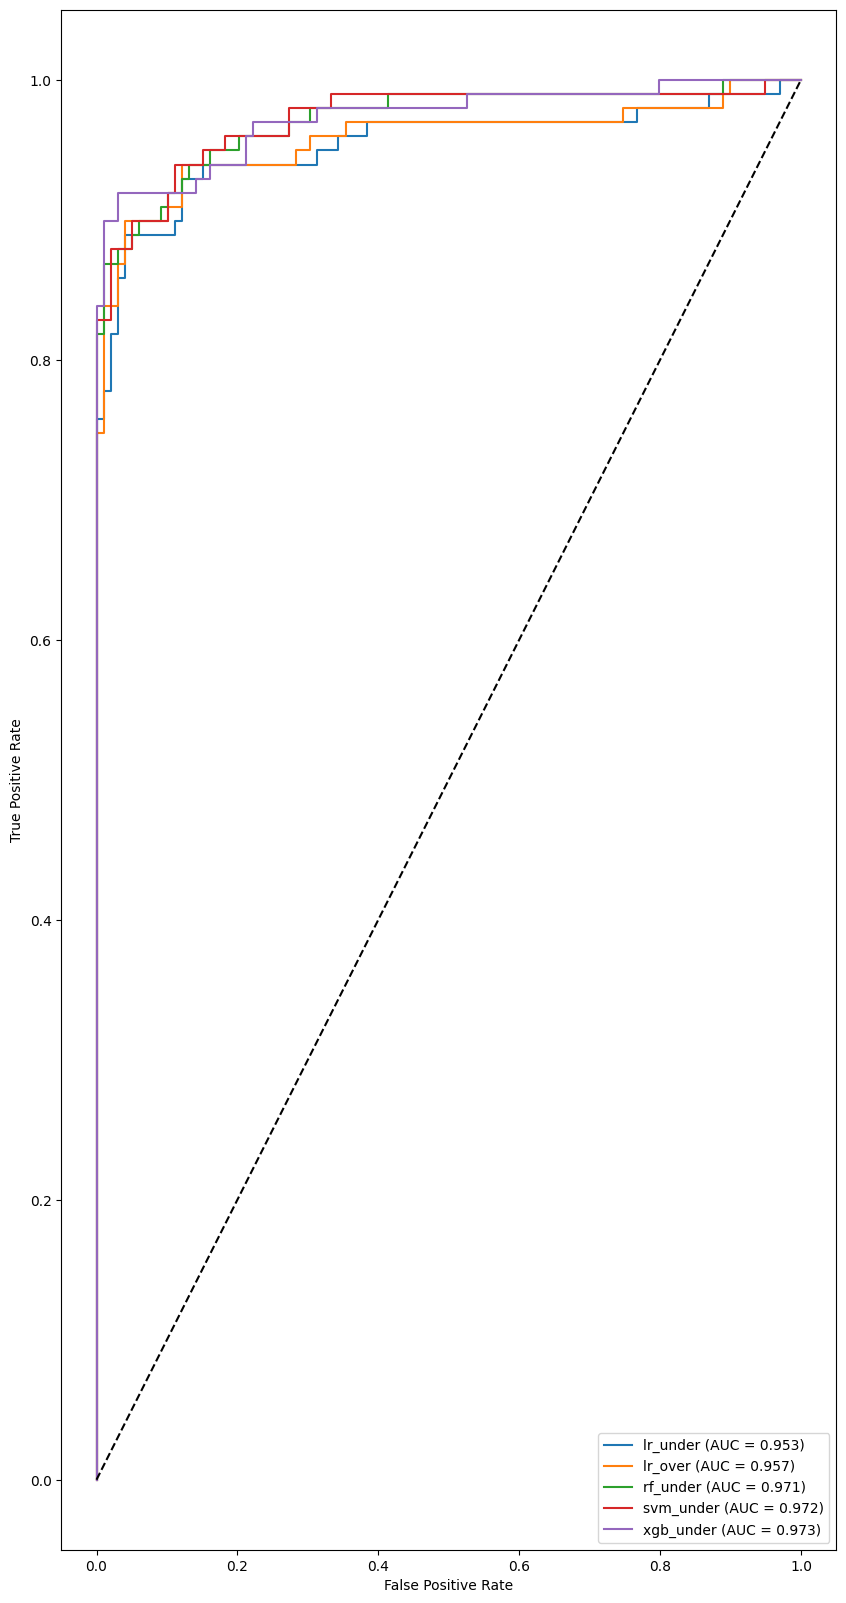

({'lr_under': 0.9533721048872564,
  'lr_over': 0.9571472298745026,
  'rf_under': 0.9709213345576984,
  'svm_under': 0.9718396082032446,
  'xgb_under': 0.9726558514437302},
 {'lr_under': 0.9025641025641026,
  'lr_over': 0.9128205128205129,
  'rf_under': 0.9130434782608696,
  'svm_under': 0.9021739130434783,
  'xgb_under': 0.9381443298969072},
 {'lr_under': 0.9040404040404041,
  'lr_over': 0.9141414141414141,
  'rf_under': 0.9191919191919192,
  'svm_under': 0.9090909090909091,
  'xgb_under': 0.9393939393939394},
 {'lr_under': 0.9166666666666666,
  'lr_over': 0.9270833333333334,
  'rf_under': 0.9882352941176471,
  'svm_under': 0.9764705882352941,
  'xgb_under': 0.9578947368421052},
 {'lr_under': 0.8888888888888888,
  'lr_over': 0.898989898989899,
  'rf_under': 0.8484848484848485,
  'svm_under': 0.8383838383838383,
  'xgb_under': 0.9191919191919192},
 {'lr_under': 0.9034681865063905,
  'lr_over': 0.9238506867452367,
  'rf_under': 0.49044442850744197,
  'svm_under': -0.22137254973322373,
  

In [37]:
roc_curve_plot(models, X_train_rus, y_train_rus, x_val_rus, y_val_rus)

In [38]:
# update scores
scores



,name,mean_score,params
0,lr_under,0.981858,"{'C': 100.0, 'penalty': 'l2', 'tol': 0.001}"
1,lr_over,0.992529,"{'tol': 0.01, 'penalty': 'l2', 'C': 1000.0}"
2,rf_under,0.982545,"{'n_estimators': 1000, 'min_samples_split': 10..."
3,svm_under,0.967763,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}"
4,xgb_under,0.979077,"{'subsample': 1.0, 'n_estimators': 100, 'max_d..."


In [39]:
f1_scores

{'lr_under': 0.9025641025641026,
 'lr_over': 0.9128205128205129,
 'rf_under': 0.9130434782608696,
 'svm_under': 0.9021739130434783,
 'xgb_under': 0.9381443298969072}

In [40]:
scores.insert(3,"roc_auc_score",roc_auc_scores.values(),True)

In [41]:
scores.insert(4,"f1_scores",f1_scores.values(),True)


In [42]:
scores.insert(5,"accuracy_scores",accuracy_scores.values(),True)
scores.insert(6,"precision_scores",precision_scores.values(),True)
scores.insert(7,"recall_scores",recall_scores.values(),True)



In [43]:
scores.insert(8,"threshold",threshold.values(),True)

We droped LR_Over as we no longer was using RandomOverSampling for any of the models as it was taking too long to load.

In [44]:
scores = scores.drop(index=1)

In [45]:
#update index of scores
scores.index = [0,1,2,3]
scores

,name,mean_score,params,roc_auc_score,f1_scores,accuracy_scores,precision_scores,recall_scores,threshold
0,lr_under,0.981858,"{'C': 100.0, 'penalty': 'l2', 'tol': 0.001}",0.953372,0.902564,0.904040,0.916667,0.888889,0.903468
1,rf_under,0.982545,"{'n_estimators': 1000, 'min_samples_split': 10...",0.970921,0.913043,0.919192,0.988235,0.848485,0.490444
2,svm_under,0.967763,"{'C': 1.0, 'gamma': 'scale', 'kernel': 'rbf'}",0.971840,0.902174,0.909091,0.976471,0.838384,-0.221373
3,xgb_under,0.979077,"{'subsample': 1.0, 'n_estimators': 100, 'max_d...",0.972656,0.938144,0.939394,0.957895,0.919192,0.625897


From the score dataframe we can see that rf_under and xgb_under are the best models as they have higher mean_score, roc_auc_score, f1_score, accuracy_score compared to other models

Confusion Matrix

In [51]:
#sum of class in y_val_rus
total = y_val_rus.value_counts()
totalz = total[0] + total[1]
totalz


198

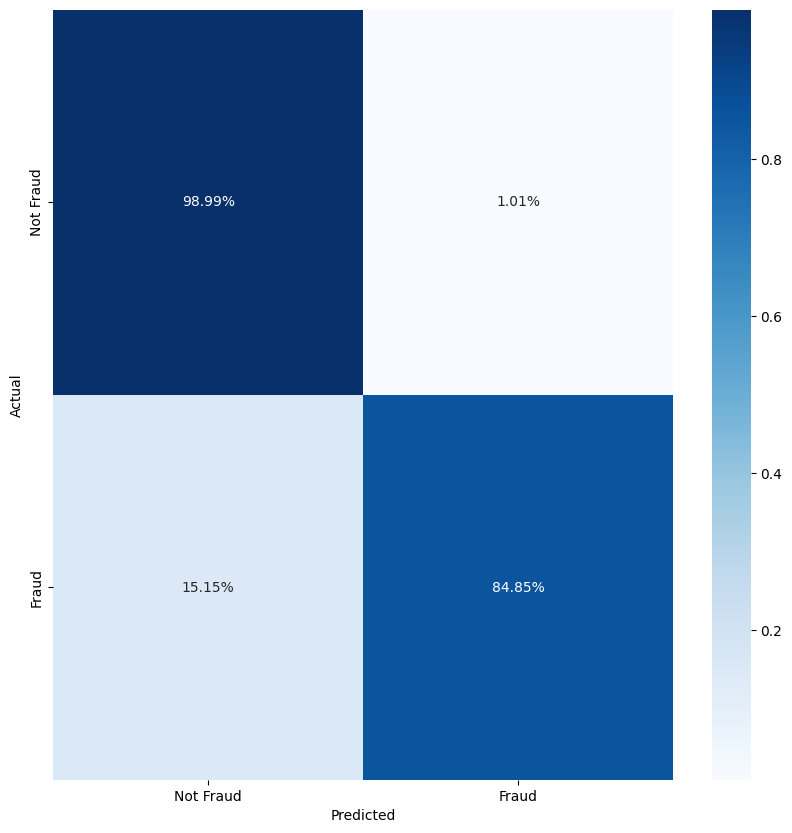

In [52]:
#confusion_matrix for rf_under using validation data set 
rf_under = RandomForestClassifier(**rf_under_param, random_state=42)
rf_under.fit(X_train_rus, y_train_rus)
y_pred_rf_under = rf_under.predict(x_val_rus)
confusion_matrix(y_val_rus, y_pred_rf_under)

#true positive of confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_val_rus, y_pred_rf_under).ravel()
perc = [tn/total[0], fp/total[0], fn/total[1], tp/total[1]]

# Reshape perc to a 2-dimensional array
perc_array = np.array(perc).reshape((2, 2))

#heatmap for confusion_matrix
plt.figure(figsize=(10, 10))
sns.heatmap(perc_array, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()



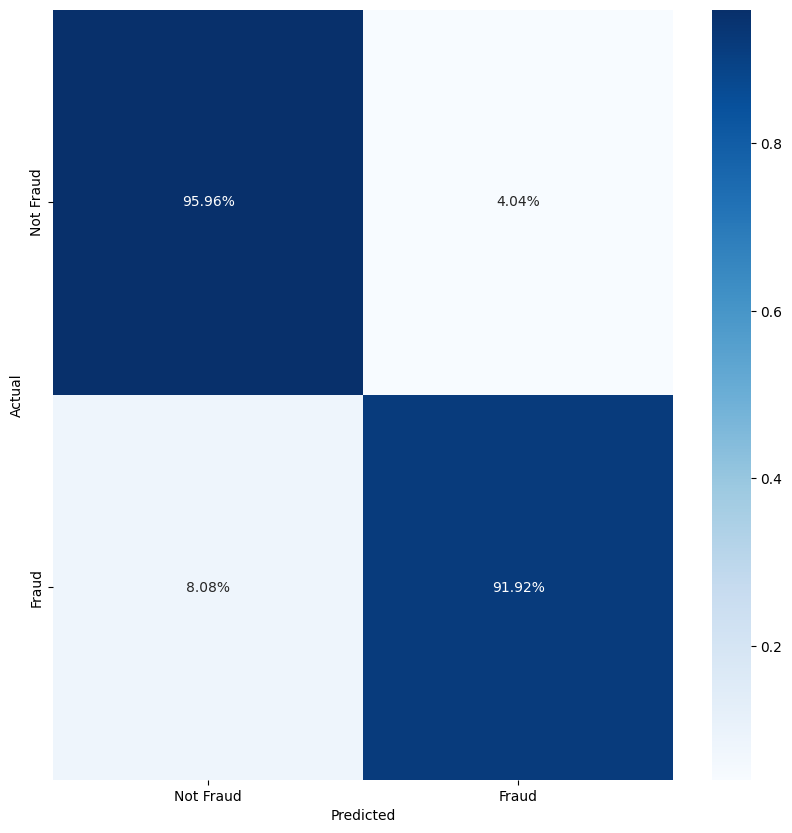

In [53]:
#confusion_matrix for xgb_under using validation data set
xgb_under = XGBClassifier(**xgb_under_param, random_state=42)
xgb_under.fit(X_train_rus, y_train_rus)
y_pred_xgb_under = xgb_under.predict(x_val_rus)
confusion_matrix(y_val_rus, y_pred_xgb_under)

#true positive of confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_val_rus, y_pred_xgb_under).ravel()
perc = [tn/total[0], fp/total[0], fn/total[1], tp/total[1]]

# Reshape perc to a 2-dimensional array
perc_array = np.array(perc).reshape((2, 2))

#heatmap for confusion_matrix
plt.figure(figsize=(10, 10))
sns.heatmap(perc_array, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


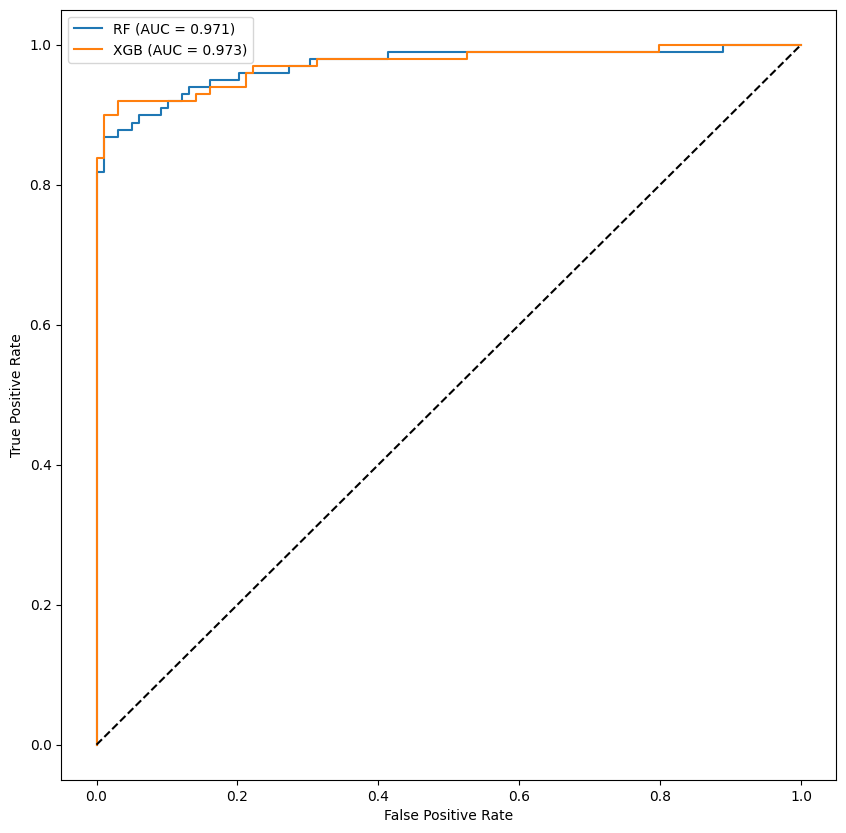

In [54]:
#area under the aupc curve for rf_under and xgb_under
y_pred_rf_under = rf_under.predict_proba(x_val_rus)[:, 1]
y_pred_xgb_under = xgb_under.predict_proba(x_val_rus)[:, 1]
fpr_rf_under, tpr_rf_under, _ = roc_curve(y_val_rus, y_pred_rf_under)
fpr_xgb_under, tpr_xgb_under, _ = roc_curve(y_val_rus, y_pred_xgb_under)
roc_auc_rf_under = roc_auc_score(y_val_rus, y_pred_rf_under)
roc_auc_xgb_under = roc_auc_score(y_val_rus, y_pred_xgb_under)
plt.figure(figsize=(10, 10))
plt.plot(fpr_rf_under, tpr_rf_under, label='RF (AUC = %0.3f)' % roc_auc_rf_under)
plt.plot(fpr_xgb_under, tpr_xgb_under, label='XGB (AUC = %0.3f)' % roc_auc_xgb_under)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()
